<h1 style="background-color:Tomato;">Logistic Regression Exercises`

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import env
import acquire

import warnings
warnings.filterwarnings("ignore")


Use the Titanic dataset.

In [36]:
tati = pd.read_csv('titanic.csv')

In [37]:
    tati = pd.read_csv('titanic.csv')
    
    to_drop = ['deck', 'Unnamed: 0',  'embarked', 'passenger_id', 'class']
    # indicating which unnecessary or superfluous columns to drop

    tati.drop(columns = to_drop, inplace = True)
    # dropping unnecessary or superfluous columns 

    tati = tati.dropna()
    #  drop rows with nulls


    # creating dummies in order to help machine learning
    tatdum = pd.get_dummies(tati[['embark_town', 'sex']], drop_first = True)

    # now that we have the DF and the dummies, use concatenation to join the two :
    pd.concat([tati, tatdum], axis = 1)

    # assigning it a variable for permanence
    tati = pd.concat([tati, tatdum], axis = 1)
    tati.head()

    # dropping columns for machine learning purposes (don't do this for exploration purposes)
    tati = tati.drop(columns = ['embark_town', 'sex'], axis = 1)
    tati.columns

    # setting the 'survived' column to Boolean T / F
    tati['survived'] = np.where(tati['survived'] == True, 1, 0)

In [38]:
tati.info()  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 712 non-null    int64  
 1   pclass                   712 non-null    int64  
 2   age                      712 non-null    float64
 3   sibsp                    712 non-null    int64  
 4   parch                    712 non-null    int64  
 5   fare                     712 non-null    float64
 6   alone                    712 non-null    int64  
 7   embark_town_Queenstown   712 non-null    uint8  
 8   embark_town_Southampton  712 non-null    uint8  
 9   sex_male                 712 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 46.6 KB


In [39]:
# split data before getting baseline

In [40]:
def train_val_test(df, target, seed = 23):
    
    train, val_test = train_test_split(df, train_size = 0.7, 
                                       random_state = seed, 
                                       stratify = df[target])
    
    val, test = train_test_split(val_test, train_size = 0.5, 
                                 random_state = seed, 
                                 stratify = val_test[target])
    
    return train, val, test

## function to train, validate, test data

In [41]:
train, val, test  = train_val_test(tati, 'survived')

train.shape, val.shape, test.shape

# returning the data shapes / sizes to be trained, validated, tested

((498, 10), (107, 10), (107, 10))

In [42]:
# split train, val, test into X_train, X_val, X_test (feature DF, exludes var 'survived') and y-train, etc

# y_train is only our target

# X_train is everything except for 'survived'

X_train = train.drop(columns = ['survived'])
y_train = train['survived']


X_val = val.drop(columns = ['survived'])
y_val = val['survived']


X_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [43]:
# baseline for survival is to die (ie, ['survived'] == '0').
# compute baseline based on y_train (a series)

bline_pred = y_train.mode() # most common value = 0

set_baseline_prediction = y_train == 0

# take mean of set_baseline_prediction and that is the accuracy
bline = set_baseline_prediction.mean()
# Boolean baseline (T = 1, F = 0)

print(f"The baseline survival accuracy rate is {bline}.")

The baseline survival accuracy rate is 0.5963855421686747.


**<p style="background-color:Tomato;"> 1 / Create a model with only age, fare and pclass. Does this model perform better than your baseline ?**

In [91]:
# set a variable equal to the logistic regression object 
# set using default values

seed = 23

logit_afp = LogisticRegression(C = 1, random_state = seed,
                              intercept_scaling = 1,
                              solver = 'liblinear')

In [92]:
# fit the objet to the train

logit_afp.fit(X_train[['age', 'pclass','fare']], y_train)

# selsecting columns from X_train to examine

LogisticRegression(random_state=23)

In [93]:
logit_afp.classes_

# the underscores_ indicate that it's an attribute

array([0, 1])

In [94]:
logit_afp.coef_

# coefficients are being returned in a list of a list.

array([[-0.05033246, -1.19434412,  0.00439945]])

In [95]:
logit_afp.coef_[0]

array([-0.05033246, -1.19434412,  0.00439945])

In [96]:
len(logit_afp.coef_[0])

3

In [97]:
len(X_train.columns)

9

In [98]:
# let's create a DF and 配 the features

pd.DataFrame({'columns' : X_train[['age', 'pclass','fare']].columns,
             'coefficient' : logit_afp.coef_[0]})

# 'columns' : X_train[[...]].columns.tolist() returns the same results

# the coefficient can be translated to the importance / weight of the feature. 
# the larger the coefficient, the more important the feature

,columns,coefficient
0,age,-0.050332
1,pclass,-1.194344
2,fare,0.004399


In [99]:
# this is the y intercept on the graph
logit_afp.intercept_


# the 'coefficient' above are, in theory, the x-axis datapoints (??)

array([3.54943514])

In [100]:
# scoring the model for [['age', 'pclass','fare']]

logit_afp.score(X_train[['age', 'pclass','fare']], y_train)

# Makes predictions on the X_train set against the y_train reality.

0.7188755020080321

In [65]:
# validation accuracy score

logit_afp.score(X_val[['age', 'pclass','fare']], y_val)

0.7009345794392523

**Observation :**  
    The training accuracy of 71.89pc and the validation accuracy of 70.93pc are both better than the baseline of 59.63pc.

In [61]:
#establishing y_predictions on X_train

y_pred = logit_afp.predict(X_train[['age', 'pclass','fare']])

# Makes predictions on the X_train set against the y_train reality.

In [62]:
# returning the confusion matrix as an array

confusion_matrix(y_pred, y_train)


array([[248,  91],
       [ 49, 110]])

In [63]:
# assigning confusion matrix values to appropriate variables

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

TN, FP, FN, TP

(248, 49, 91, 110)

In [76]:
print(f'Classification Report for survival based on age, fare & pclass.')
print()
print(classification_report(y_train, y_pred))
print('-.-.-.-.-.-')
print(f'The baseline accuracy for non-survival in all cases on the Titanic is {round(bline, 4)}.')


Classification Report for survival based on age, fare & pclass.

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       297
           1       0.69      0.55      0.61       201

    accuracy                           0.72       498
   macro avg       0.71      0.69      0.70       498
weighted avg       0.72      0.72      0.71       498

-.-.-.-.-.-
The baseline accuracy for non-survival in all cases on the Titanic is 0.5964.


**TAKEAWAY :**  
    THE MODEL BASED SOLELY ON AGE, PCLASS AND FARE INDICATES A HIGHER RATE OF SURVIVAL THAN THE BASELINE IN ALL CASES.

**<p style="background-color:Tomato;">2 / Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.**

In [77]:
# logistic regression model comprising age, fare, pclass, sex_male

logit_afps = LogisticRegression(random_state = seed)

In [80]:
# fit the objet to the train

logit_afps.fit(X_train[['age', 'pclass','fare', 'sex_male']], y_train)

# selsecting columns from X_train to examine

LogisticRegression(random_state=23)

In [85]:
# create a DF to pair the features

afps = pd.DataFrame({'columns' : X_train[['age', 'pclass','fare', 'sex_male']].columns,
             'coefficient' : logit_afps.coef_[0]})
afps

,columns,coefficient
0,age,-0.045091
1,pclass,-1.425580
2,fare,-0.000709
3,sex_male,-2.508688


In [86]:
# this is the y intercept on the graph
logit_afps.intercept_


array([5.53501253])

In [101]:
# scoring the model for [['age', 'pclass','fare','sex_male']]

logit_afps.score(X_train[['age', 'pclass', 'fare', 'sex_male']], y_train)

# train accuracy of 83.13pc

0.8313253012048193

In [102]:
# validation accuracy score

logit_afps.score(X_val[['age', 'pclass','fare', 'sex_male']], y_val)

# validation accuracy of 79.44pc

0.794392523364486

**Observation :**  
    The training accuracy of 83.13pc and the validation accuracy of 79.44pc are both better than the baseline of 59.63pc, and better than the model that was solely based on 'age', 'pclass', 'fare' (and excluded the currently included 'sex_male').

In [104]:
#establishing y_predictions on X_train

y_pred_afps = logit_afps.predict(X_train[['age', 'pclass','fare', 'sex_male']])

In [105]:
# returning the confusion matrix as an array

confusion_matrix(y_pred_afps, y_train)


array([[258,  45],
       [ 39, 156]])

In [106]:
confusion_matrix(y_pred_afps, y_train) - confusion_matrix(y_pred, y_train)

# curious about the differences when including 'sex_male' (first equasion)

array([[ 10, -46],
       [-10,  46]])

In [107]:
# assigning confusion matrix values to appropriate variables

TN_afps, FP_afps, FN_afps, TP_afps = confusion_matrix(y_train, y_pred_afps).ravel()

TN_afps, FP_afps, FN_afps, TP_afps

(258, 39, 45, 156)

In [108]:
print(f'Classification Report for survival based on age, fare, pclass and the sex_male dummy variable.')
print()
print(classification_report(y_train, y_pred_afps))
print('-.-.-.-.-.-')
print(f'The baseline accuracy for non-survival in all cases on the Titanic is {round(bline, 4)}.')


Classification Report for survival based on age, fare, pclass and the sex_male dummy variable.

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       297
           1       0.80      0.78      0.79       201

    accuracy                           0.83       498
   macro avg       0.83      0.82      0.82       498
weighted avg       0.83      0.83      0.83       498

-.-.-.-.-.-
The baseline accuracy for non-survival in all cases on the Titanic is 0.5964.


**TAKEAWAY :**  
    INCLUDING THE 'sex_male' COLUMN INCREASED THE LIKELIHOOD OF ACCURACY IN PREDICTION.

In [115]:
# look at options to predict probability, instead of just T / F

# certainty for each option : [['age', 'pclass','fare']]

probability_array_afp = logit_afp.predict_proba(X_val[['age', 'pclass','fare']])
probability_array_afp

# each row its own list
# each row adds up to 1 (F prob / T prob)

array([[0.74203195, 0.25796805],
       [0.78698146, 0.21301854],
       [0.75172319, 0.24827681],
       [0.74197931, 0.25802069],
       [0.76073067, 0.23926933],
       [0.75153495, 0.24846505],
       [0.81092294, 0.18907706],
       [0.34101526, 0.65898474],
       [0.71157916, 0.28842084],
       [0.82630996, 0.17369004],
       [0.4867013 , 0.5132987 ],
       [0.57054466, 0.42945534],
       [0.73492344, 0.26507656],
       [0.73217626, 0.26782374],
       [0.74201788, 0.25798212],
       [0.25057002, 0.74942998],
       [0.38464009, 0.61535991],
       [0.88166261, 0.11833739],
       [0.70178658, 0.29821342],
       [0.2834477 , 0.7165523 ],
       [0.83941339, 0.16058661],
       [0.85913727, 0.14086273],
       [0.71205296, 0.28794704],
       [0.59409499, 0.40590501],
       [0.77039803, 0.22960197],
       [0.8183875 , 0.1816125 ],
       [0.89805639, 0.10194361],
       [0.23604838, 0.76395162],
       [0.9559102 , 0.0440898 ],
       [0.47891315, 0.52108685],
       [0.

In [116]:
## write a list comprehension to allow for graphing 

probability_T_afp = np.array([row[1] for row in probability_array_afp])
probability_T_afp[:5]

array([0.25796805, 0.21301854, 0.24827681, 0.25802069, 0.23926933])

In [118]:
graph_afp = pd.DataFrame({'probability_True': probability_T_afp,
             'actual_label' : y_val})

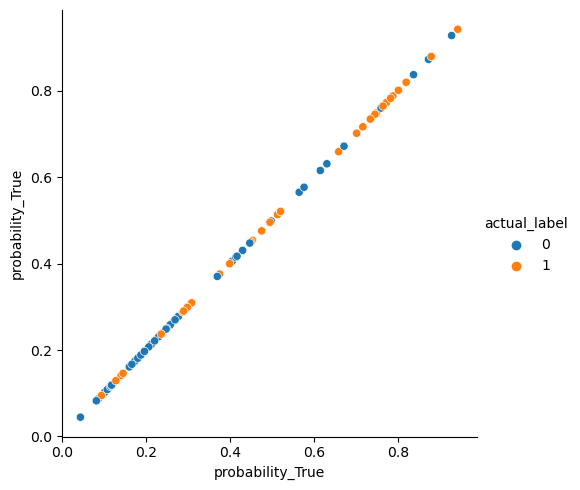

In [120]:
sns.relplot(data = graph_afp, x = 'probability_True', y = 'probability_True', hue = 'actual_label')

In [133]:
# certainty for each option : [['age', 'pclass','fare', 'sex_male']]

probability_array_afps = logit_afps.predict_proba(X_val[['age', 'pclass','fare', 'sex_male']])
probability_array_afps
## write a list comprehension to allow for graphing 

probability_T_afps = np.array([row[1] for row in probability_array_afps])
probability_T_afps[:5]

array([0.09949869, 0.0810261 , 0.09554394, 0.09949472, 0.09169814])

In [134]:
graph_afps = pd.DataFrame({'probability_True.': probability_T_afps,
             'actual_label' : y_val})

In [135]:
sns.relplot(data = graph_afps, x = 'probability_True.', y = 'probability_True.', hue = 'actual_label')